In [1]:
import pandas as pd
from sklearn import tree

import numpy as np
import math
# import DecisionTree as DT
from DecisionTreeClassifier import DecisionTree
import scipy.stats as st

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def load_data(datafile):
    data = np.genfromtxt(datafile)
    X = []
    Y = []
    for row in data:
        X.append(row[:-1])
        Y.append(row[-1])
    X = np.array(X)
    Y = np.array(Y)
    return X,Y, data

In [293]:
from DecisionTreeClassifier import load_data as load

cols = ['x1', 'x2']
op = ['Outcome']

d = d8192
n = 8192


x = np.array(d[cols])
y = np.array(d[op])

# y = ['b'] * (n//2) + ['r'] * (n//2)

In [294]:
clf = tree.DecisionTreeClassifier()
cl_tree = clf.fit(d[cols], d[op])

-2.0 2.0 0.0 -2.9265529811382294
-2.0 2.0 1.0734470188617706 -2.925579011440277
-2.0 -0.08772549778223038 1.074420988559723 -0.7681215032935143
-0.08772549778223038 -0.07005699723958969 -0.8378535136580467 -0.7857900038361549
-0.07005699723958969 -0.03702799929305911 -0.8555220142006874 -0.8188190017826855
-0.03702799929305911 0.12330300360918045 -0.888551012147218 -0.9791500046849251
0.12330300360918045 2.0 -1.0488820150494576 -2.8558470010757446
-2.0 -0.33549049496650696 1.1441529989242554 -0.35148850083351135
-0.33549049496650696 -0.2613319978117943 -0.5203565061092377 -0.48584599047899246
-0.33549049496650696 -0.2613319978117943 -0.4116874933242798 -0.42564699798822403
-0.2613319978117943 -0.19814450293779373 -0.5945150032639503 -0.6132934913039207
-0.2613319978117943 -0.19814450293779373 -0.5501059964299202 -0.4888344928622246
-0.19814450293779373 0.19065549969673157 -0.6577024981379509 -0.8776344954967499
0.19065549969673157 0.2615565061569214 -1.0465025007724762 -1.0695300102233

Text(0, 0.5, 'x2')

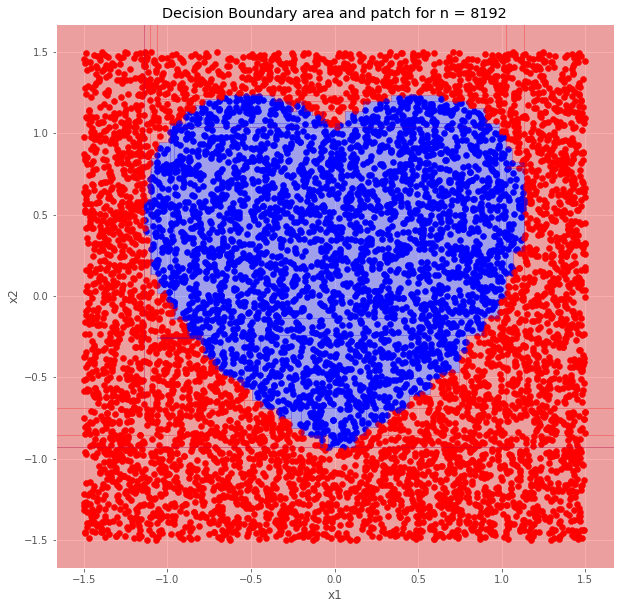

In [295]:
plt.figure(figsize=(10,10))
rectangles = decision_areas(cl_tree, [-2, 2, -2, 2], x=0, y=1)
color = {0:'b', 1:'r'}
for i in range(len(d)):
    plt.scatter(x[i][0], x[i][1], c=color[y[i][0]])
# plt.scatter(x[:, 0], x[:, 1], c = y)
plot_areas(rectangles)

plt.title("Decision Boundary area and patch for n = 8192")
plt.xlabel("x1")
plt.ylabel("x2")

In [235]:
import numpy as np
from collections import deque
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import _tree as ctree
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


class AABB:
    """Axis-aligned bounding box"""
    def __init__(self, n_features):
        self.limits = np.array([[-np.inf, np.inf]] * n_features)

    def split(self, f, v):
        left = AABB(self.limits.shape[0])
        right = AABB(self.limits.shape[0])
        left.limits = self.limits.copy()
        right.limits = self.limits.copy()

        left.limits[f, 1] = v
        right.limits[f, 0] = v

        return left, right


def tree_bounds(tree, n_features=None):
    """Compute final decision rule for each node in tree"""
    if n_features is None:
        n_features = np.max(tree.feature) + 1
    aabbs = [AABB(n_features) for _ in range(tree.node_count)]
    queue = deque([0])
    while queue:
        i = queue.pop()
        l = tree.children_left[i]
        r = tree.children_right[i]
        if l != ctree.TREE_LEAF:
            aabbs[l], aabbs[r] = aabbs[i].split(tree.feature[i], tree.threshold[i])
            queue.extend([l, r])
    return aabbs


def decision_areas(tree_classifier, maxrange, x=0, y=1, n_features=None):
    """ Extract decision areas.

    tree_classifier: Instance of a sklearn.tree.DecisionTreeClassifier
    maxrange: values to insert for [left, right, top, bottom] if the interval is open (+/-inf) 
    x: index of the feature that goes on the x axis
    y: index of the feature that goes on the y axis
    n_features: override autodetection of number of features
    """
    tree = tree_classifier.tree_
    aabbs = tree_bounds(tree, n_features)

    rectangles = []
    for i in range(len(aabbs)):
        if tree.children_left[i] != ctree.TREE_LEAF:
            continue
        l = aabbs[i].limits
        r = [l[x, 0], l[x, 1], l[y, 0], l[y, 1], np.argmax(tree.value[i])]
        rectangles.append(r)
    rectangles = np.array(rectangles)
    rectangles[:, [0, 2]] = np.maximum(rectangles[:, [0, 2]], maxrange[0::2])
    rectangles[:, [1, 3]] = np.minimum(rectangles[:, [1, 3]], maxrange[1::2])
    return rectangles

def plot_areas(rectangles):
    for rect in rectangles:
        color = ['b', 'r'][int(rect[4])]
        print(rect[0], rect[1], rect[2] - rect[0], rect[3] - rect[1])
        rp = Rectangle([rect[0], rect[2]], 
                       rect[1] - rect[0], 
                       rect[3] - rect[2], color=color, alpha=0.3)
        plt.gca().add_artist(rp)

In [185]:
df1 = load('D1.txt')
df2 = load('D2.txt')
df3leaves = load('D3leaves.txt')
dfruns = load('Druns.txt')
dbig = load('Dbig.txt')
dtest = load('D_test.txt')

In [301]:
np.savetxt("d32.csv", d32, delimiter=' ')
np.savetxt("d128.csv", d128 ,delimiter=' ')
np.savetxt("d512.csv", d512 ,delimiter=' ')
np.savetxt("d2048.csv", d2048 ,delimiter=' ')
np.savetxt("d8192.csv", d8192 ,delimiter=' ')
np.savetxt("dtestt.csv", df_test, delimiter=' ')

In [303]:
co = cols + op
co

['x1', 'x2', 'Outcome']

In [328]:
a = np.asarray(df_test[co])
np.savetxt('dbig_test.csv', a,'%s', ',')

In [315]:
pd.DataFrame(d32).to_csv("d32.csv")

In [186]:
# Sample out a test set from dbig and test it separately.

dbig_train = dbig.sample(n=8192)
df_test = dbig.loc[~dbig.index.isin(dbig_train.index)]

In [190]:
d32 = dbig_train[:32]
d128 = dbig_train[:128]
d512 = dbig_train[:512]
d2048 = dbig_train[:2048]
d8192 = dbig_train[:8192]

In [201]:
Tree = DecisionTree(d8192, cols)
Tree()


 ****************************** 

Level  0 

{'Headline': 'x2 >= -0.547397;  Gain = 0.051924541345307884',
 'Level': 0,
 'Predecessor': 8192,
 'Split': [5511, 2681]}

 ****************************** 

Level  1 

{'Headline': 'x2 >= 1.232245;  Gain = 0.05898317724679819',
 'Level': 1,
 'Predecessor': 5511,
 'Split': [742, 4769]}
{'Headline': 'x2 >= -0.9261870000000001;  Gain = 0.012286508367303287',
 'Level': 1,
 'Predecessor': 2681,
 'Split': [1061, 1620]}

 ****************************** 

Level  2 

{'Instances': 742, 'Label': 1, 'Level': 2}
{'Headline': 'x1 >= 1.0099360000000002;  Gain = 0.09006268280791069',
 'Level': 2,
 'Predecessor': 4769,
 'Split': [787, 3982]}
{'Headline': 'x1 >= -0.496374;  Gain = 0.021702363784645018',
 'Level': 2,
 'Predecessor': 1061,
 'Split': [704, 357]}
{'Instances': 1620, 'Label': 1, 'Level': 2}

 ****************************** 

Level  3 

{'Headline': 'x1 >= 1.135791;  Gain = 0.032907055795325074',
 'Level': 3,
 'Predecessor': 787,
 'Split': [596, 1

In [204]:
Tree.predict(df_test)

{'Accuracy': 0.99, 'Error': 0.010000000000000009}


In [205]:
nodes = {
    32: 4,
    128: 7,
    512: 17,
    2048: 49,
    8192: 118 ,
    
}



In [2]:
error_self = {
    32: 0.12,
    128: 0.0999,
    512: 0.05,
    2048: 0.02,
    8192: 0.01 ,
    
}

error_weka = {
    32: 0.0979,
    128: 0.1091,
    512: 0.0707,
    2048: 0.0364,
    8192: 0.0128 ,
    
}

In [21]:
plt.style.available

['seaborn-paper',
 'seaborn-poster',
 'seaborn-dark-palette',
 'Solarize_Light2',
 'seaborn-dark',
 'fast',
 'seaborn-darkgrid',
 'ggplot',
 'seaborn-muted',
 'dark_background',
 'seaborn-pastel',
 'seaborn-whitegrid',
 'seaborn-talk',
 'seaborn-bright',
 'seaborn-deep',
 '_classic_test',
 'classic',
 'seaborn-colorblind',
 'seaborn-ticks',
 'seaborn',
 'fivethirtyeight',
 'grayscale',
 'bmh',
 'seaborn-notebook',
 'seaborn-white',
 'tableau-colorblind10']

In [47]:
plt.style.use('ggplot')

Text(0.5, 1.0, 'Change in Test Error with varying Training dataset size')

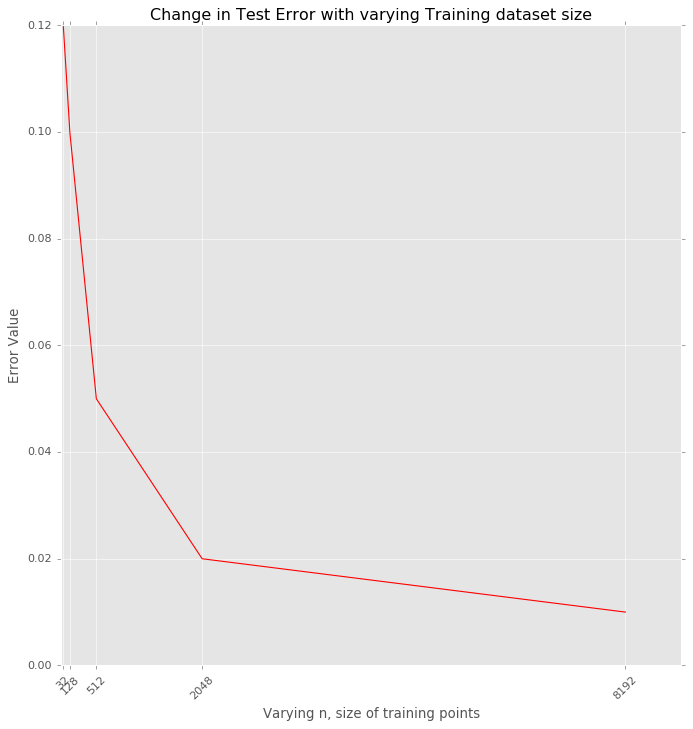

In [48]:
plt.figure(figsize=(10,10))
# for i, err in enumerate(error.values()):
#     plt.plot(i, err)

x = list(error_weka.keys())
ac_ticks = [str(i) for i in list(error_weka.keys())]
plt.plot(x,list(error_self.values()), c='r')
plt.xticks(x, ac_ticks, rotation=45, size=10)
plt.ylabel("Error Value")
plt.xlabel("Varying n, size of training points")
plt.grid(True)
plt.title("Change in Test Error with varying Training dataset size")

In [44]:
155 -78

77

In [ ]:
plt.figure(figsize=(10,10))
# for i, err in enumerate(error.values()):
#     plt.plot(i, err)

x = [1,2,3,4,5]
ac_ticks = ["n = "+str(i) for i in list(error.keys())]
plt.plot(x,list(error.values()), c='r', linewidth=3)
plt.xticks(x, ac_ticks, rotation=45, size=20)
plt.ylabel("Error Value")
plt.xlabel("Varying n, size of training points")
plt.title("Change in Test Error with varying Training dataset size")

Text(0, 0.5, 'x2')

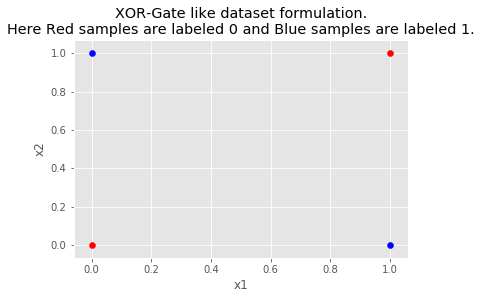

In [158]:
#q2

_, _, data_test = load_data('D_test.txt')

col = {0: 'r', 1:'b'}
for row in data_test:
    plt.scatter(row[0], row[1], c=col[row[-1]])
    
plt.title("XOR-Gate like dataset formulation.\nHere Red samples are labeled 0 and Blue samples are labeled 1.")
plt.xlabel('x1')
plt.ylabel('x2')

In [162]:
2 * 0.5 * np.log2(0.5) 

-1.0

In [178]:
def select_threshold(df, attribute):
    """
    Find value in a column or attribute that maximizes Gain

    :param df: data
    :param attribute: Column Name for the attribute of interest
    """

    values = df[attribute].tolist()
    values = [float(x) for x in values]

    max_ig = float("-inf")
    thres_val = 0

    # Check across all values of an attribute and find IGain
    for i in range(0, len(values)):
        thres = values[i]
        ig = Tree._info_gain(df, attribute, thres)
        print(thres, np.round(ig,4))
        if ig >= max_ig:
            max_ig = ig
            thres_val = thres

    return thres_val

In [179]:
select_threshold(dfruns, 'x1')

0.1 0.0315
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


0.1

In [180]:
select_threshold(dfruns, 'x2')

-2.0 0.0
-1.0 0.0315
0.0 -0.0341
1.0 -0.0428
2.0 -0.0395
3.0 -0.0299
4.0 -0.0148
5.0 0.0062
6.0 0.0401
7.0 -0.0341
8.0 0.1042


8.0

In [ ]:
# D2 Decision Boundary


x1 = np.linspace(0,0.104,20)
y1 = [0.964 for _ in x1]

y2 = np.linspace(0.89, 0.964, 20)
x2 = [0.104 for _ in y2]

x3 = np.linspace(0.104, 0.147, 20)
y3 = [0.89 for _ in x3]

y4 = np.linspace(0.86, 0.89, 20)
x4 = [0.147 for _ in y4]

x5 = np.linspace(0.147, 0.192, 20)
y5 = [0.86 for _ in x5]

y6 = np.linspace(0.792 ,0.86, 20)
x6 = [0.192 for _ in y6]

x7 = np.linspace(0.192, 0.25, 20)
y7 = [0.792 for _ in x7]

y8 = np.linspace(0.69, 0.792,20)
x8 = [0.25 for _ in y8]

x9 = np.linspace(0.25, 0.409, 20)
y9 = [0.69 for _ in x9]

y10 = np.linspace(0.57, 0.69,20)
x10 = [0.409 for _ in y10]

x11 = np.linspace(0.409, 0.450, 20)
y11 =  [0.57 for _ in x11]

y12 = np.linspace(0.506, 0.57,20)
x12 = [0.450 for _ in y12]



x13 = np.linspace(0.450, 0.533, 20)
y13 = [0.506 for _ in x13] 


y14 = np.linspace(0.420, 0.506, 20) 
x14 = [0.533 for _ in y14]


x15 = np.linspace(0.533, 0.540, 20)
y15 = [0.420 for _ in x15]



y16 = np.linspace(0.407, 0.420, 20)
x16 = [0.540 for _ in y16]


x17 = np.linspace(0.540, 0.646, 20)
y17 = [0.407 for _ in x17]


y18 = np.linspace(0.320, 0.407, 20)
x18 = [0.646 for _ in y18]


x19 = np.linspace(0.646, 0.70, 20)
y19 = [0.320 for _ in x19]


y20 = np.linspace(0.224, 0.320, 20)
x20 = [0.70 for _ in y20]


x21 = np.linspace(0.70, 0.85, 20)
y21 = [0.224 for _ in x21]


y22 = np.linspace(0.196, 0.224, 20)
x22 = [0.85 for _ in y22]

x23 = np.linspace(0.85, 0.94, 20)
y23 = [0.196 for _ in x23]


y24 = np.linspace(0.03, 0.196, 20)
x24 = [0.94 for _ in y24]

x25 = np.linspace(0.94, 1.00, 20)
y25 = [0.03 for _ in x25]


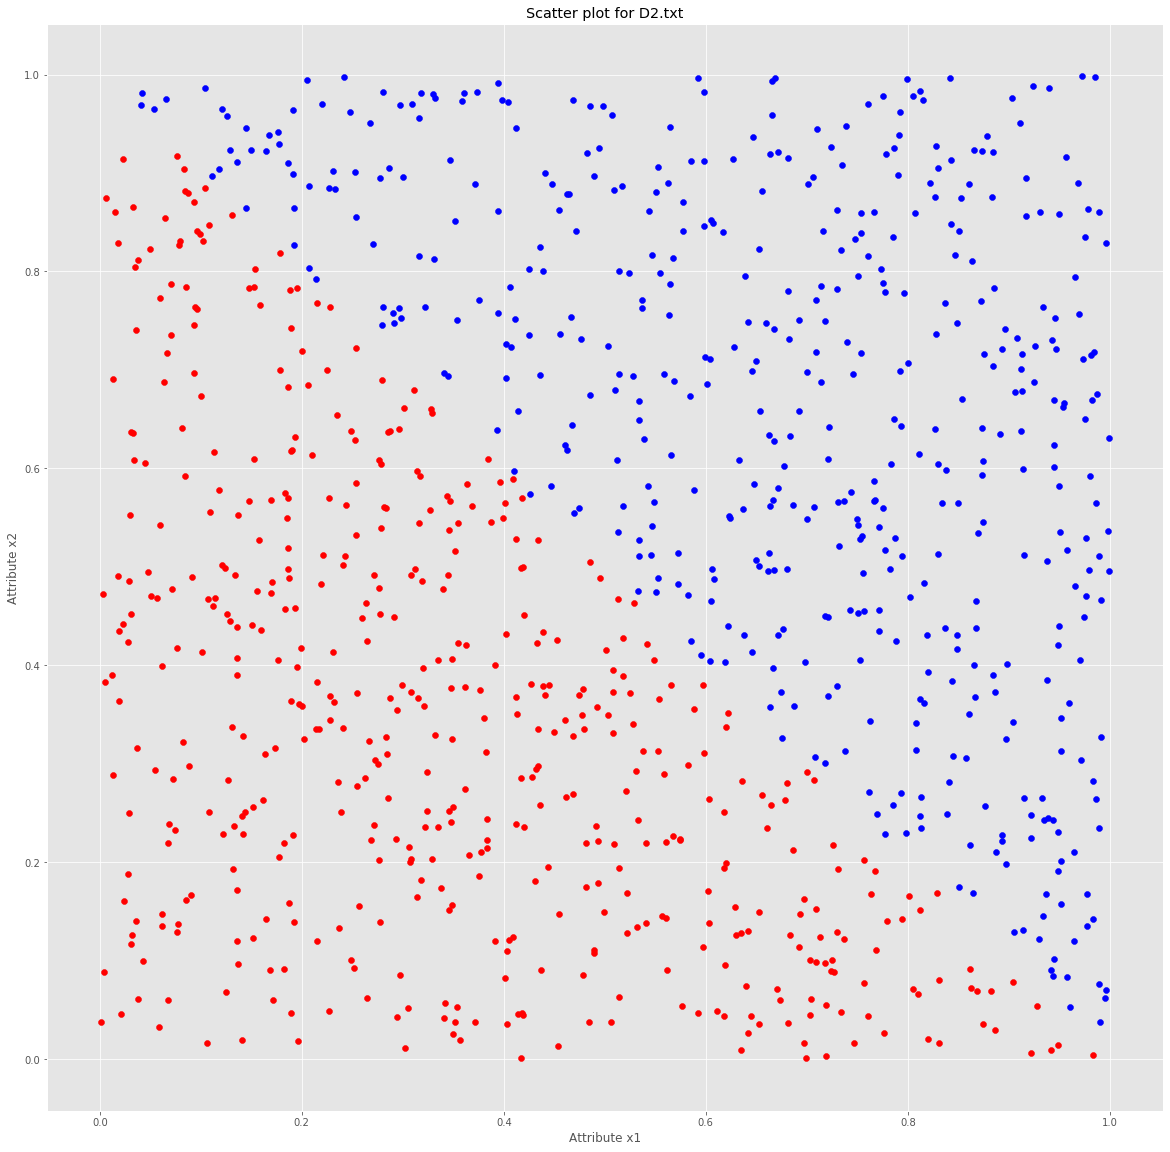

In [183]:

# D2.txt

_, _, data1 = load_data("D2.txt")
plt.figure(figsize=(20,20))
col = {0: 'r', 1:'b'}
for row in data1:
    plt.scatter(row[0], row[1], c=col[row[-1]])
    
# xr = np.linspace(0,1,20)
# yr = [0.201829 for _ in xr]
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)

# plt.plot(x1, y1, '--', c='k', linewidth=5)
# plt.plot(x2, y2, '--', c='k', linewidth=5)
# plt.plot(x3, y3, '--', c='k', linewidth=5)
# plt.plot(x4, y4, '--', c='k', linewidth=5)
# plt.plot(x5, y5, '--', c='k', linewidth=5)
# plt.plot(x6, y6, '--', c='k', linewidth=5)
# plt.plot(x7, y7, '--', c='k', linewidth=5)
# plt.plot(x8, y8, '--', c='k', linewidth=5)
# plt.plot(x9, y9, '--', c='k', linewidth=5)
# plt.plot(x10, y10, '--', c='k', linewidth=5)
# plt.plot(x11, y11, '--', c='k', linewidth=5)
# plt.plot(x12, y12, '--', c='k', linewidth=5)

# plt.plot(x13, y13, '--', c='k', linewidth=5)
# plt.plot(x14, y14, '--', c='k', linewidth=5)
# plt.plot(x15, y15, '--', c='k', linewidth=5)
# plt.plot(x16, y16, '--', c='k', linewidth=5)
# plt.plot(x17, y17, '--', c='k', linewidth=5)
# plt.plot(x18, y18, '--', c='k', linewidth=5)
# plt.plot(x19, y19, '--', c='k', linewidth=5)
# plt.plot(x20, y20, '--', c='k', linewidth=5)
# plt.plot(x22, y21, '--', c='k', linewidth=5)
# plt.plot(x21, y21, '--', c='k', linewidth=5)
# plt.plot(x23, y23, '--', c='k', linewidth=5)
# plt.plot(x24, y24, '--', c='k', linewidth=5)
# plt.plot(x25, y25, '--', c='k', linewidth=5)


# plt.plot(xr, yr, 'g', linewidth=4)
# plt.title("Scatter Plot for D2.txt with Decision Boundary generated for Decision Tree.\nDecision Boundary is shown in Black.\nLabel 1: Blue; Label 0: Red")
plt.title("Scatter plot for D2.txt")
plt.xlabel("Attribute x1")
plt.ylabel("Attribute x2")
plt.show()

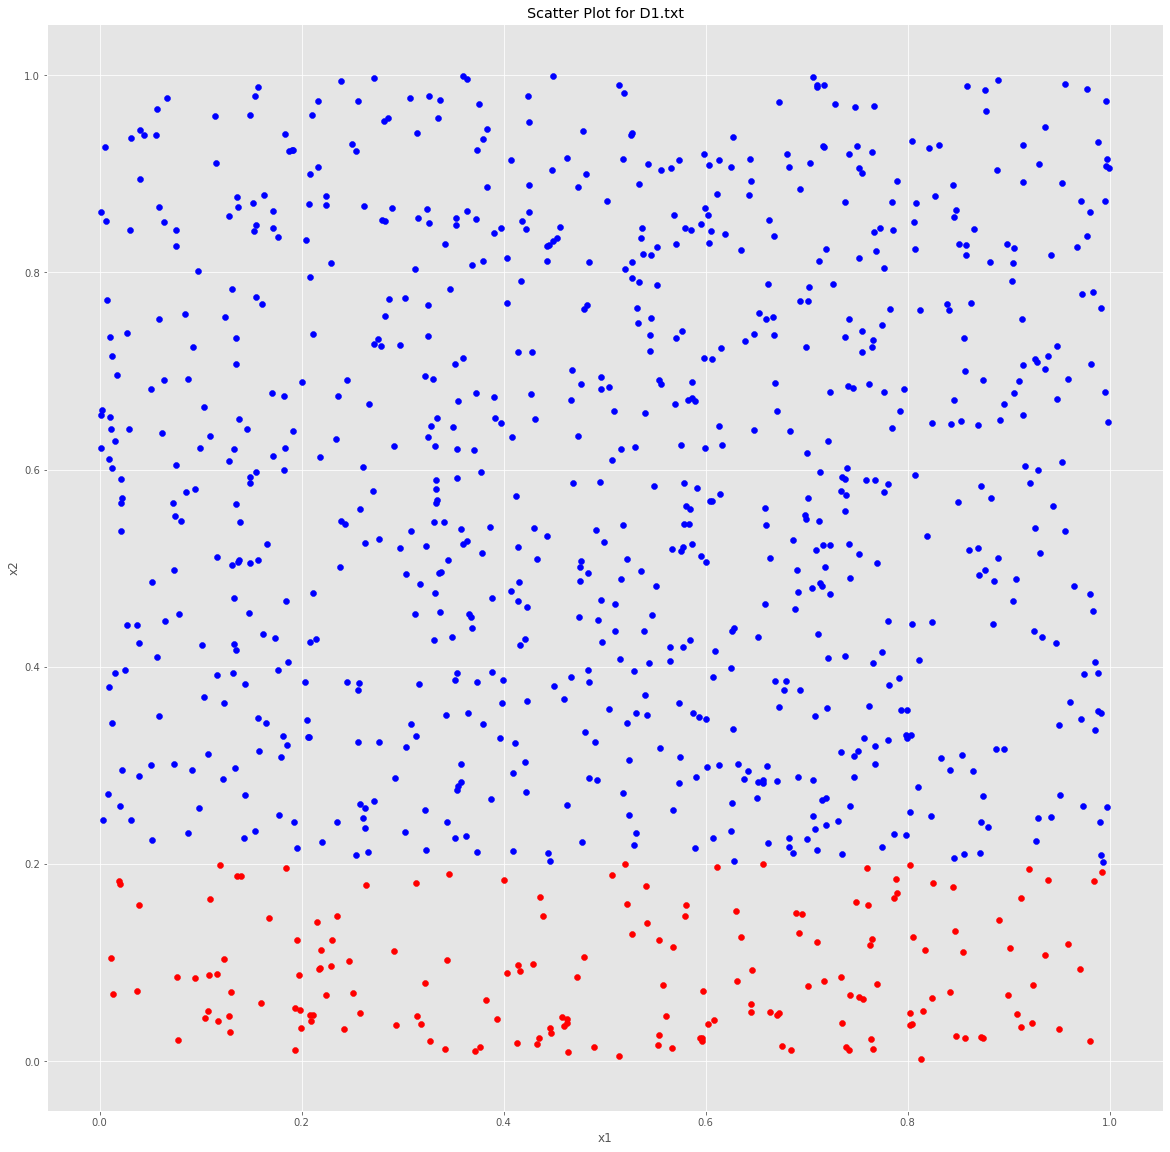

In [184]:
# D1.txt

plt.figure(figsize=(20,20))
_, _, data1 = load_data("D1.txt")
col = {0: 'r', 1:'b'}
for row in data1:
    plt.scatter(row[0], row[1], c=col[row[-1]])
    
xr = np.linspace(0,1,20)
yr = [0.201829 for _ in xr]
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
# plt.plot(xr, yr, '--', c='k',linewidth=5)
plt.title("Scatter Plot for D1.txt")
# plt.title("Scatter Plot for D1.txt with Decision Boundary generated for Decision Tree.\nDecision Boundary is shown in Black.\nLabel 1: Blue; Label 0: Red")
plt.show()

enter x: 1
enter y: 1
..........
.X........
..........
..........
..........


In [ ]:
def tictactoe(x, y, M=3, N=3)